In [40]:
import pandas as pd   # For handling tabular datasets using DataFrames.
import seaborn as sb
from matplotlib import pyplot as plt # Visualization toolkit for plotting graphs like histograms and heatmaps.
import numpy as np # For numerical operations and working with arrays efficiently
import collections
from collections import Counter # Helpful for tallying counts of repeated elements
import sklearn # scikit-learn package
from sklearn.model_selection import train_test_split # To divide the data into training and testing portions.
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report





In [41]:
data_frame = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')


In [42]:
data_frame


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [43]:
data_frame.shape


(2111, 17)

In [44]:
data_frame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [45]:
data_frame.describe()  # produces summary statistics


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [46]:
data_frame.columns


Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [47]:
data_frame.columns = ['Gender', 'Age', 'Height', 'Weight', 'Family History with Overweight',
       'Frequent consumption of high caloric food', 'Frequency of consumption of vegetables', 'Number of main meals', 'Consumption of food between meals', 'Smoke', 'Consumption of water daily', 'Calories consumption monitoring', 'Physical activity frequency', 'Time using technology devices',
       'Consumption of alcohol', 'Transportation used', 'Obesity']

data_frame



,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [48]:
data_frame['Obesity'] = data_frame['Obesity'].apply(lambda val: val.replace('_', ' '))  # Replacing underscores with spaces for better readability in labels
data_frame['Transportation used'] = data_frame['Transportation used'].apply(lambda val: val.replace('_', ' '))
data_frame['Height'] = data_frame['Height'] * 100
data_frame['Height'] = data_frame['Height'].round(1)
data_frame['Weight'] = data_frame['Weight'].round(1)
data_frame['Age'] = data_frame['Age'].round(1)
data_frame


,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.0,162.0,64.0,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public Transportation,Normal Weight
1,Female,21.0,152.0,56.0,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public Transportation,Normal Weight
2,Male,23.0,180.0,77.0,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public Transportation,Normal Weight
3,Male,27.0,180.0,87.0,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight Level I
4,Male,22.0,178.0,89.8,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public Transportation,Overweight Level II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21.0,171.1,131.4,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public Transportation,Obesity Type III
2107,Female,22.0,174.9,133.7,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public Transportation,Obesity Type III
2108,Female,22.5,175.2,133.7,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public Transportation,Obesity Type III
2109,Female,24.4,173.9,133.3,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public Transportation,Obesity Type III


In [49]:
for feature in ['Frequency of consumption of vegetables', 'Number of main meals', 'Consumption of water daily', 'Physical activity frequency', 'Time using technology devices']:
    arr = np.array(data_frame[feature])
    print(feature, ':', 'min:', np.min(arr), 'max:', np.max(arr))



Frequency of consumption of vegetables : min: 1.0 max: 3.0
Number of main meals : min: 1.0 max: 4.0
Consumption of water daily : min: 1.0 max: 3.0
Physical activity frequency : min: 0.0 max: 3.0
Time using technology devices : min: 0.0 max: 2.0


## Exploratory Data Analysis

In [50]:
for feature in ['Frequency of consumption of vegetables', 'Number of main meals', 'Consumption of water daily', 'Physical activity frequency', 'Time using technology devices']:
    data_frame[feature] = data_frame[feature].apply(round)
    arr = np.array(data_frame[feature])
    print(feature, ':', 'min:', np.min(arr), 'max:', np.max(arr), data_frame[feature].dtype)
    print(data_frame[feature].unique())


Frequency of consumption of vegetables : min: 1 max: 3 int64
[2 3 1]
Number of main meals : min: 1 max: 4 int64
[3 1 4 2]
Consumption of water daily : min: 1 max: 3 int64
[2 3 1]
Physical activity frequency : min: 0 max: 3 int64
[0 3 2 1]
Time using technology devices : min: 0 max: 2 int64
[1 0 2]


In [51]:
data_frame_copy = data_frame.copy()


In [52]:
level_map_veg = {1: 'Never', 2: 'Sometimes', 3: 'Always'}
meal_freq_map = {1: '1', 2: '2', 3: '3', 4: '3+'}
water_intake_map = {1: 'Less than a liter', 2: 'Between 1 and 2 L', 3: 'More than 2 L'}
activity_days_map = {0: 'I do not have', 1: '1 or 2 days', 2: '2 or 4 days', 3: '4 or 5 days'}
screen_time_map = {0: '0–2 hours', 1: '3–5 hours', 2: 'More than 5 hours'}


In [53]:
data_frame['Frequency of consumption of vegetables'] = data_frame['Frequency of consumption of vegetables'].replace(level_map_veg)
data_frame['Number of main meals'] = data_frame['Number of main meals'].replace(meal_freq_map)
data_frame['Consumption of water daily'] = data_frame['Consumption of water daily'].replace(water_intake_map)
data_frame['Physical activity frequency'] = data_frame['Physical activity frequency'].replace(activity_days_map)
data_frame['Time using technology devices'] = data_frame['Time using technology devices'].replace(screen_time_map)


In [54]:
data_frame

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.0,162.0,64.0,yes,no,Sometimes,3,Sometimes,no,Between 1 and 2 L,no,I do not have,3–5 hours,no,Public Transportation,Normal Weight
1,Female,21.0,152.0,56.0,yes,no,Always,3,Sometimes,yes,More than 2 L,yes,4 or 5 days,0–2 hours,Sometimes,Public Transportation,Normal Weight
2,Male,23.0,180.0,77.0,yes,no,Sometimes,3,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,3–5 hours,Frequently,Public Transportation,Normal Weight
3,Male,27.0,180.0,87.0,no,no,Always,3,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,0–2 hours,Frequently,Walking,Overweight Level I
4,Male,22.0,178.0,89.8,no,no,Sometimes,1,Sometimes,no,Between 1 and 2 L,no,I do not have,0–2 hours,Sometimes,Public Transportation,Overweight Level II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21.0,171.1,131.4,yes,yes,Always,3,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,3–5 hours,Sometimes,Public Transportation,Obesity Type III
2107,Female,22.0,174.9,133.7,yes,yes,Always,3,Sometimes,no,Between 1 and 2 L,no,1 or 2 days,3–5 hours,Sometimes,Public Transportation,Obesity Type III
2108,Female,22.5,175.2,133.7,yes,yes,Always,3,Sometimes,no,Between 1 and 2 L,no,1 or 2 days,3–5 hours,Sometimes,Public Transportation,Obesity Type III
2109,Female,24.4,173.9,133.3,yes,yes,Always,3,Sometimes,no,More than 2 L,no,1 or 2 days,3–5 hours,Sometimes,Public Transportation,Obesity Type III


### Age, Height and Weight

In terms of height, male and female are similarly distributed according to the box plot below. While male are generally taller than female, both male and female share a similar average in weight, with female having a much larger range of weight (as well as BMI) compared to male. This is further illustrated by the steeper line plot between weight and height of female than male.

<Axes: xlabel='Gender', ylabel='Weight'>

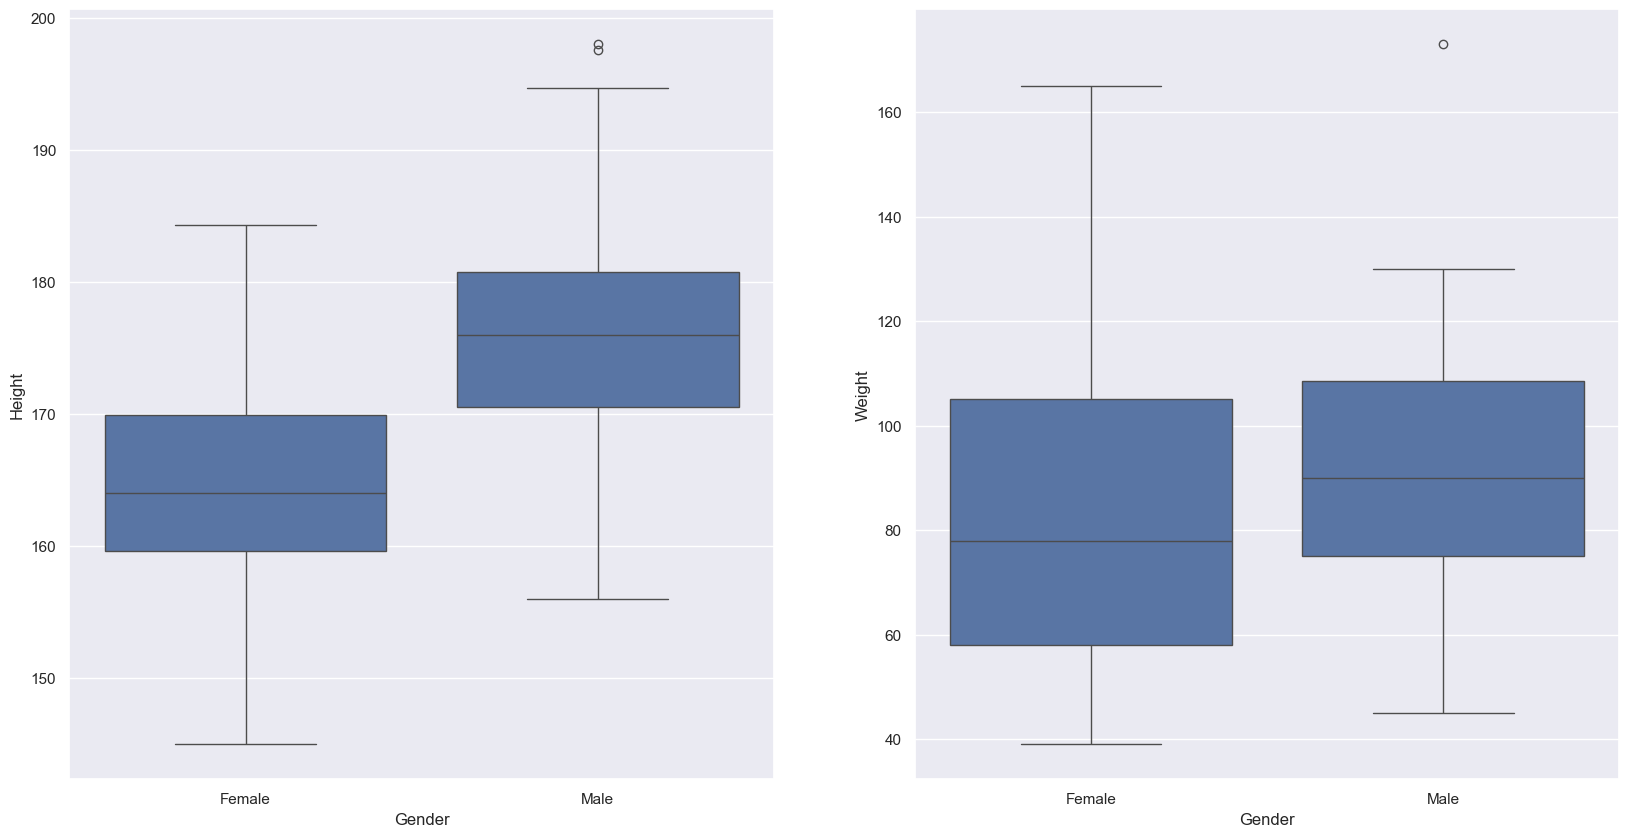

In [55]:
sb.set()
fig = plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
sb.boxplot(x='Gender', y='Height', data=data_frame)
plt.subplot(1, 2, 2)
sb.boxplot(x='Gender', y='Weight', data=data_frame)


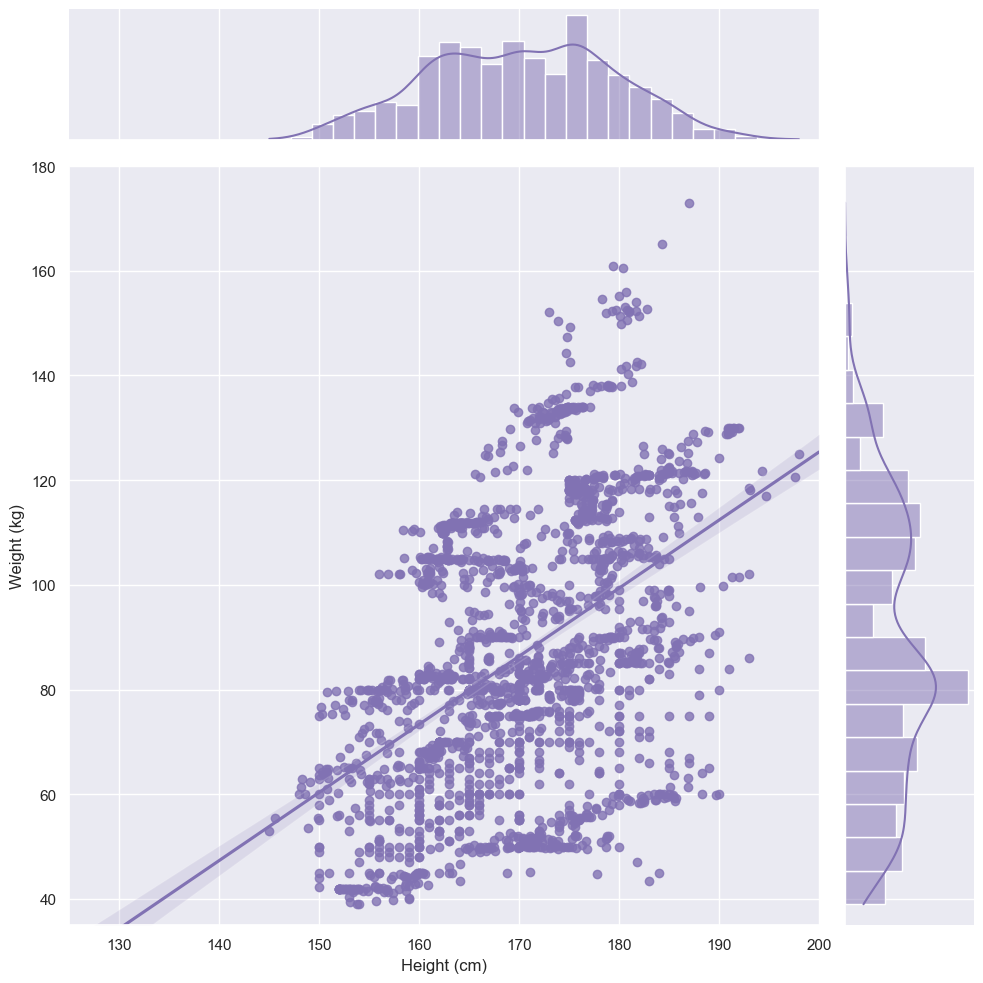

In [56]:
sb.set()
g = sb.jointplot(data=data_frame, x="Height", y="Weight",
                 kind="reg", truncate=False,
                 xlim=(125, 200), ylim=(35, 180),
                 color="m", height=10)
g.set_axis_labels("Height (cm)", "Weight (kg)")

               

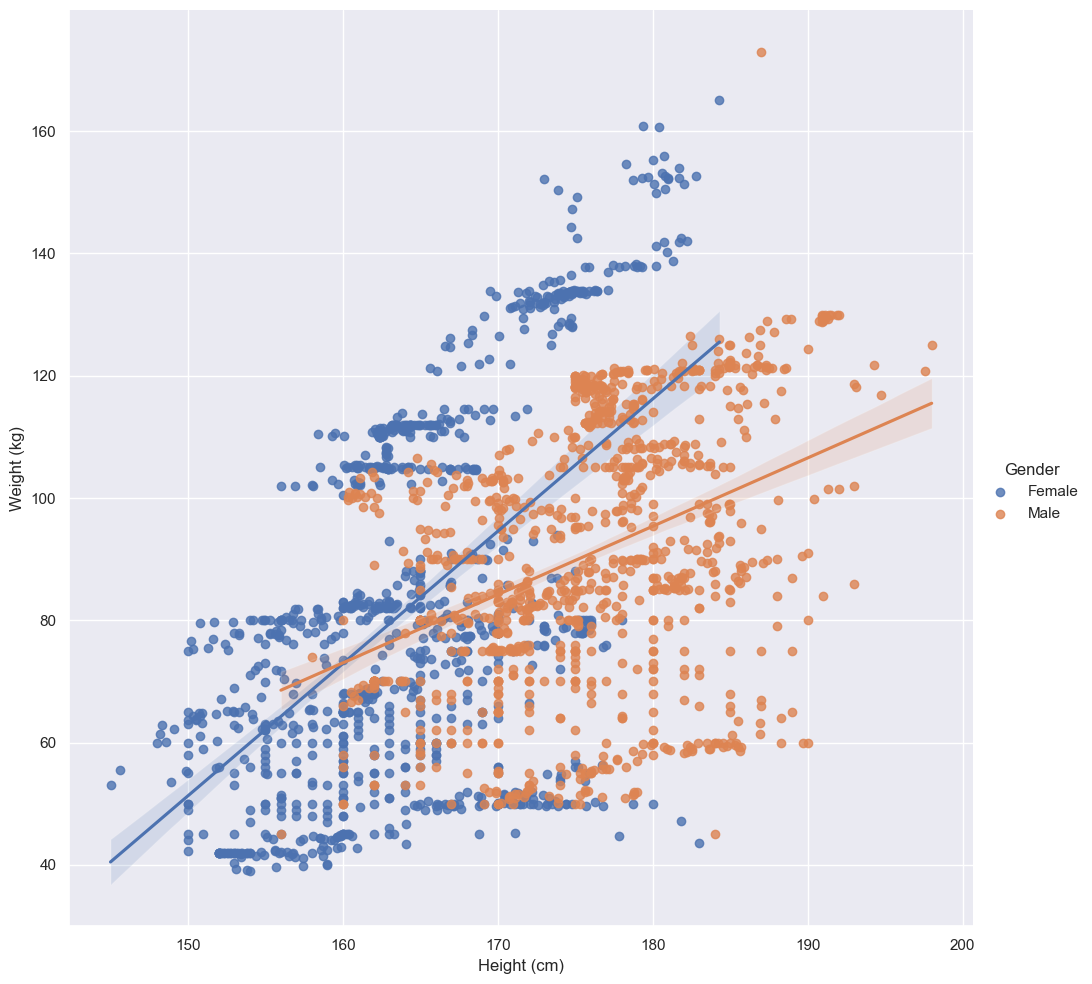

In [57]:
g = sb.lmplot(x="Height", y="Weight", hue="Gender",
              height=10, data=data_frame)
g.set_axis_labels("Height (cm)", "Weight (kg)")


### Obesity

In [58]:
c = Counter(data_frame['Obesity'])
print(c)


Counter({'Obesity Type I': 351, 'Obesity Type III': 324, 'Obesity Type II': 297, 'Overweight Level I': 290, 'Overweight Level II': 290, 'Normal Weight': 287, 'Insufficient Weight': 272})


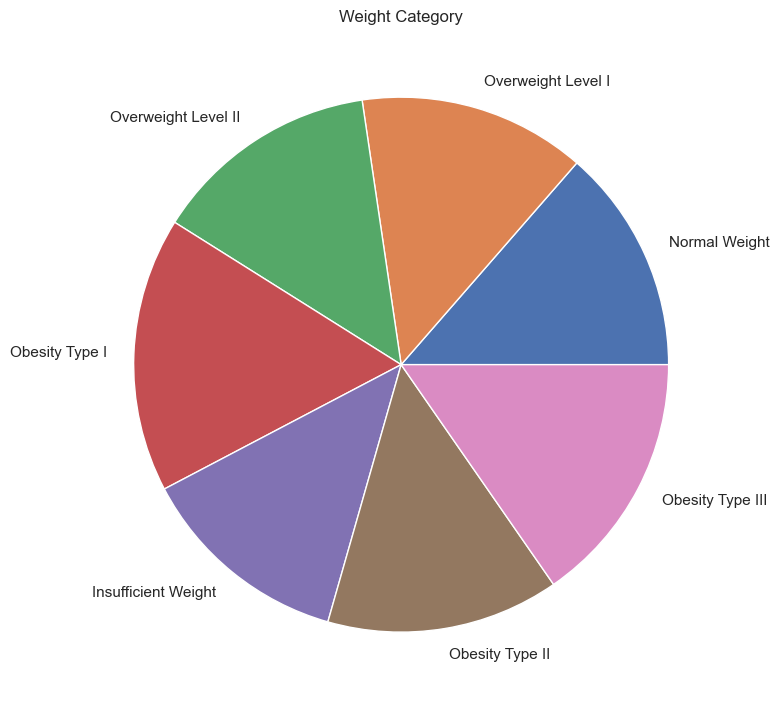

In [59]:
fig = plt.figure(figsize=(8,8))
plt.pie([float(c[v]) for v in c], labels=[str(k) for k in c], autopct=None)
plt.title('Weight Category') 
plt.tight_layout()


In [60]:
filt = data_frame['Gender'] == 'Male'
c_m = Counter(data_frame.loc[filt, 'Obesity'])
print(c_m)
c_f = Counter(data_frame.loc[~filt, 'Obesity'])
print(c_f)


Counter({'Obesity Type II': 295, 'Obesity Type I': 195, 'Overweight Level II': 187, 'Normal Weight': 146, 'Overweight Level I': 145, 'Insufficient Weight': 99, 'Obesity Type III': 1})
Counter({'Obesity Type III': 323, 'Insufficient Weight': 173, 'Obesity Type I': 156, 'Overweight Level I': 145, 'Normal Weight': 141, 'Overweight Level II': 103, 'Obesity Type II': 2})


A bigger proportion of female with a higher BMI is reflected by the large slice of Obesity Type III in the pie chart below, while Obesity Type II is the most prevalent type of obesity in make. Interestingly, there is also a higher proportion of Insufficient Weight in female compared to male, this could be explained by a heavier societal pressure on women to go on diets.

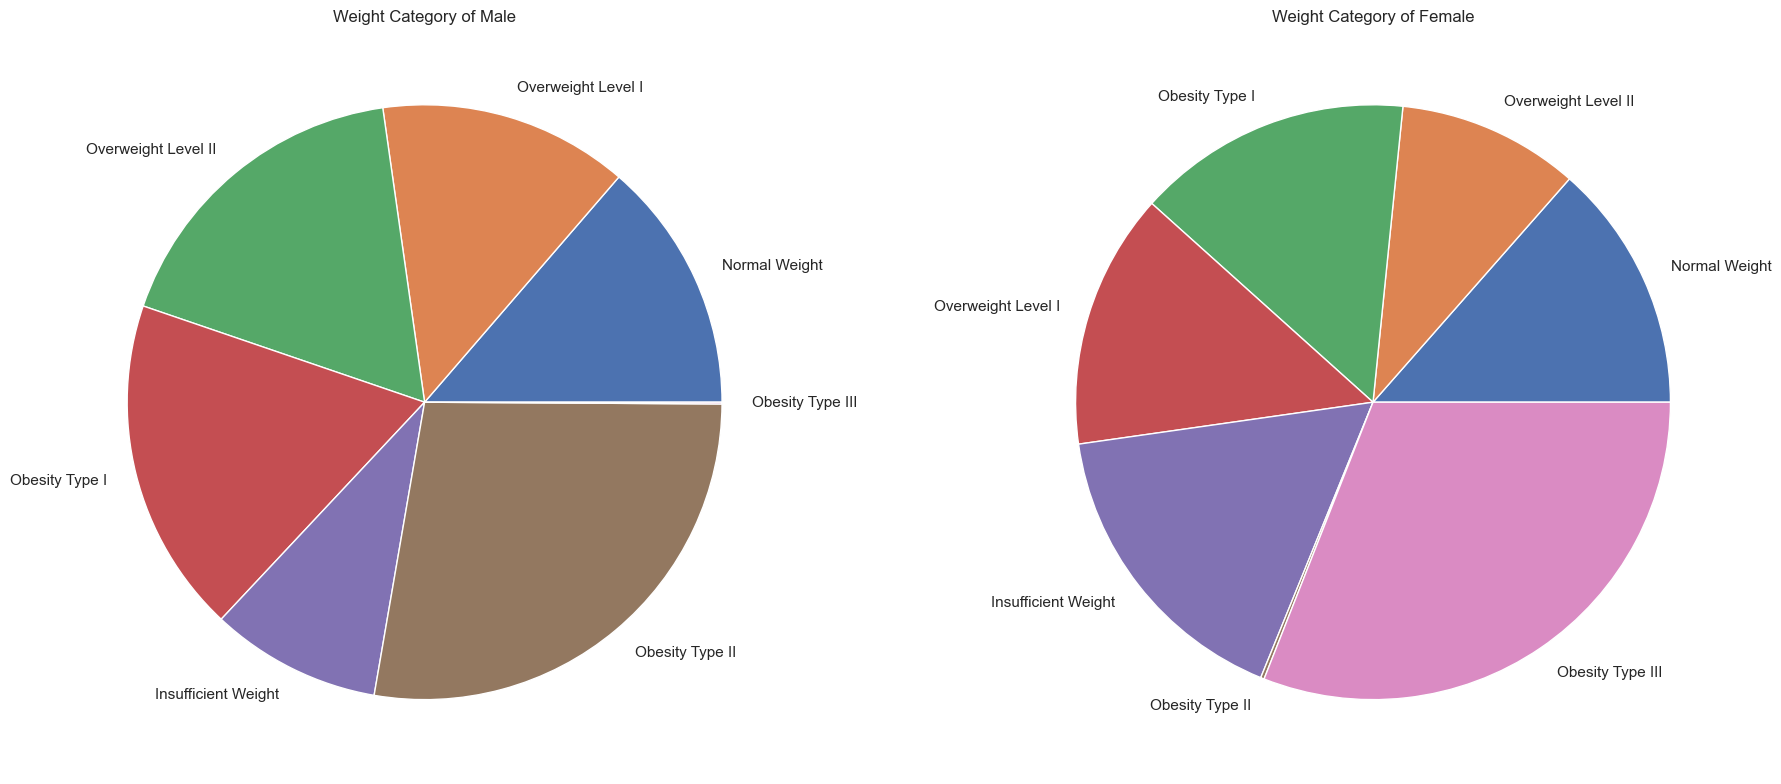

In [61]:
fig = plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.pie([float(c_m[v]) for v in c_m], labels=[str(k) for k in c_m], autopct=None)
plt.title('Weight Category of Male') 
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.pie([float(c_f[v]) for v in c_f], labels=[str(k) for k in c_f], autopct=None)
plt.title('Weight Category of Female') 
plt.tight_layout()


### Eating and Exercise Habits

Family History with Overweight ['yes', 'no'] [1726, 385]
Frequent consumption of high caloric food ['yes', 'no'] [1866, 245]
Frequency of consumption of vegetables ['Sometimes', 'Always', 'Never'] [1013, 996, 102]
Number of main meals ['3', '1', '2', '3+'] [1470, 316, 176, 149]
Consumption of food between meals ['Sometimes', 'Frequently', 'Always', 'no'] [1765, 242, 53, 51]
Smoke ['no', 'yes'] [2067, 44]
Consumption of water daily ['Between 1 and 2 L', 'More than 2 L', 'Less than a liter'] [1110, 516, 485]
Calories consumption monitoring ['no', 'yes'] [2015, 96]
Physical activity frequency ['1 or 2 days', 'I do not have', '2 or 4 days', '4 or 5 days'] [776, 720, 496, 119]
Time using technology devices ['0–2 hours', '3–5 hours', 'More than 5 hours'] [952, 915, 244]
Consumption of alcohol ['Sometimes', 'no', 'Frequently', 'Always'] [1401, 639, 70, 1]
Transportation used ['Public Transportation', 'Automobile', 'Walking', 'Motorbike', 'Bike'] [1580, 457, 56, 11, 7]


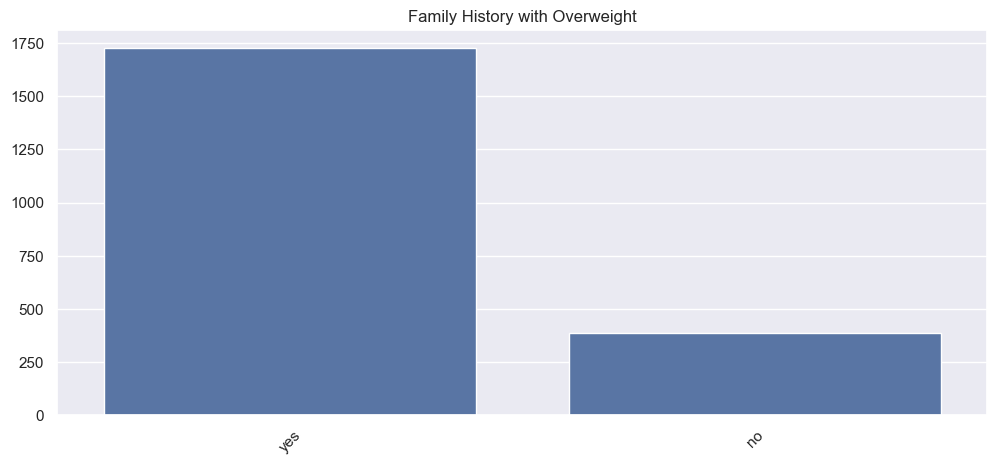

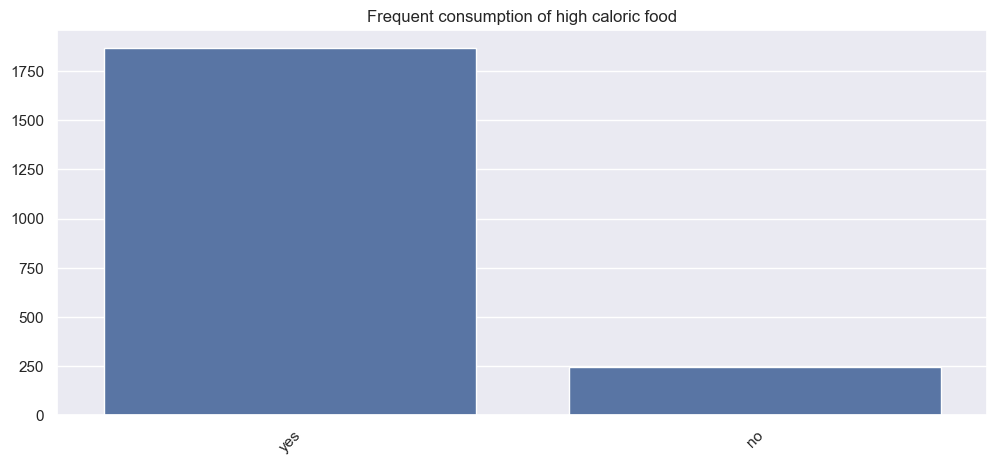

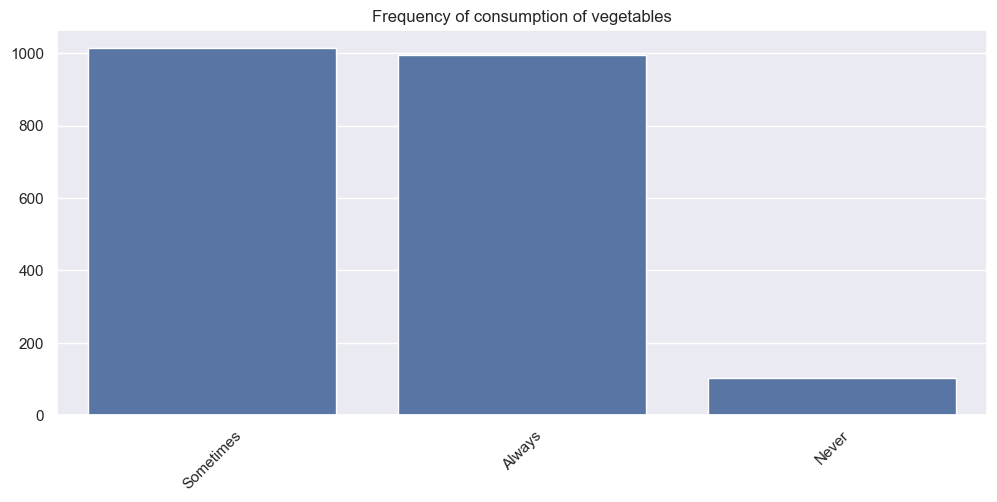

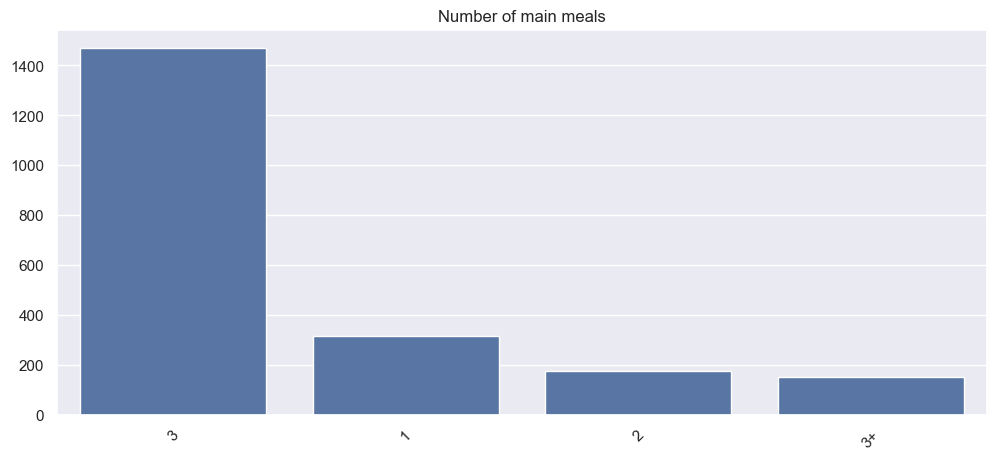

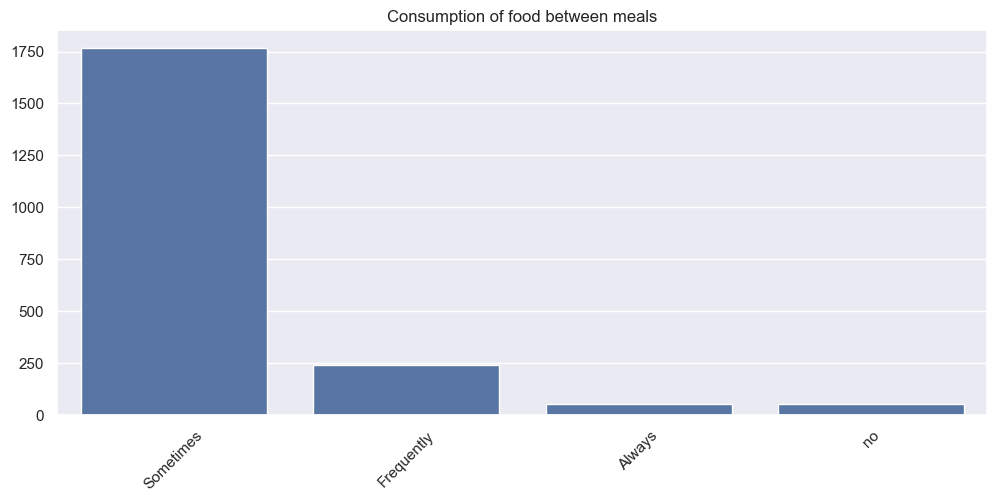

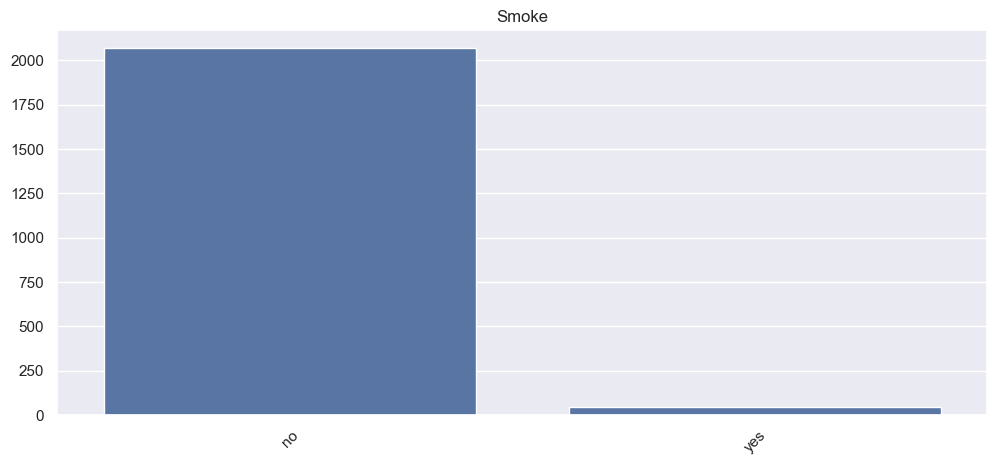

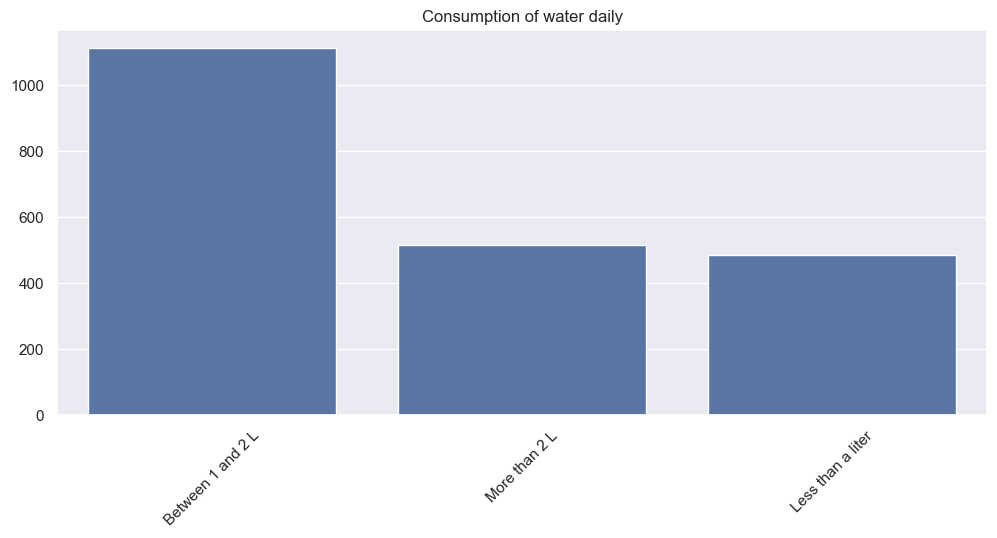

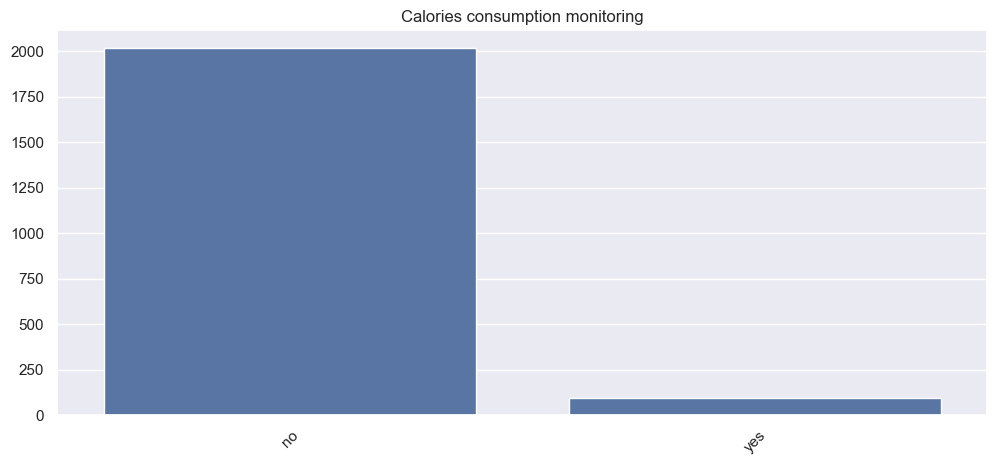

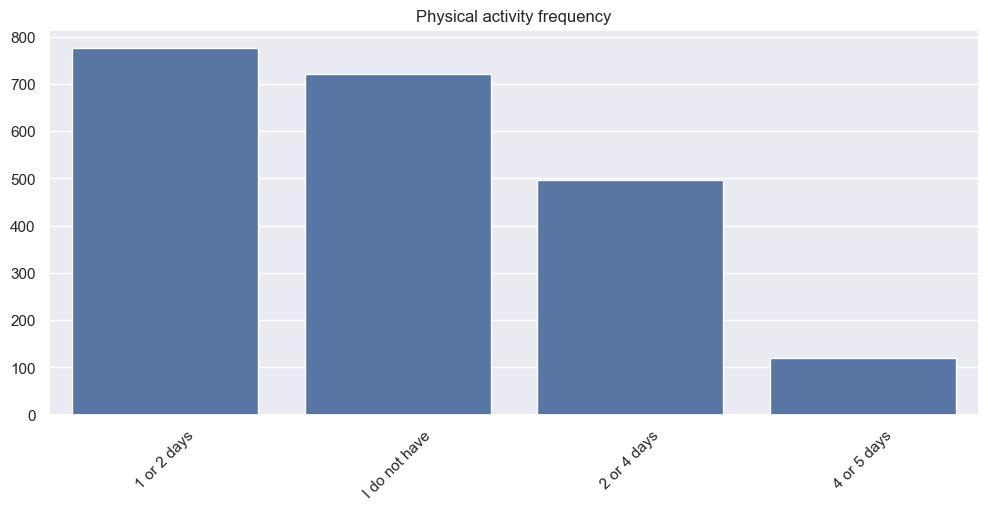

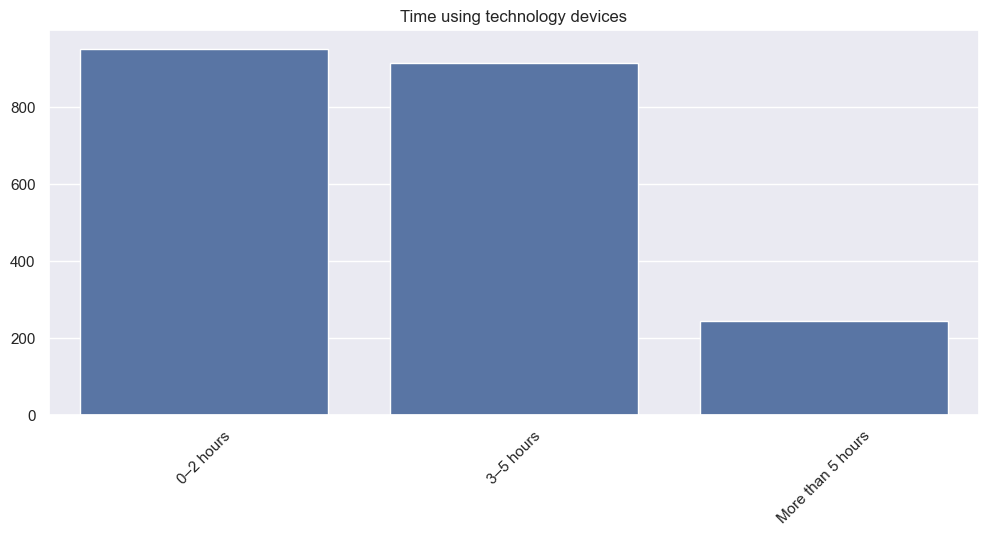

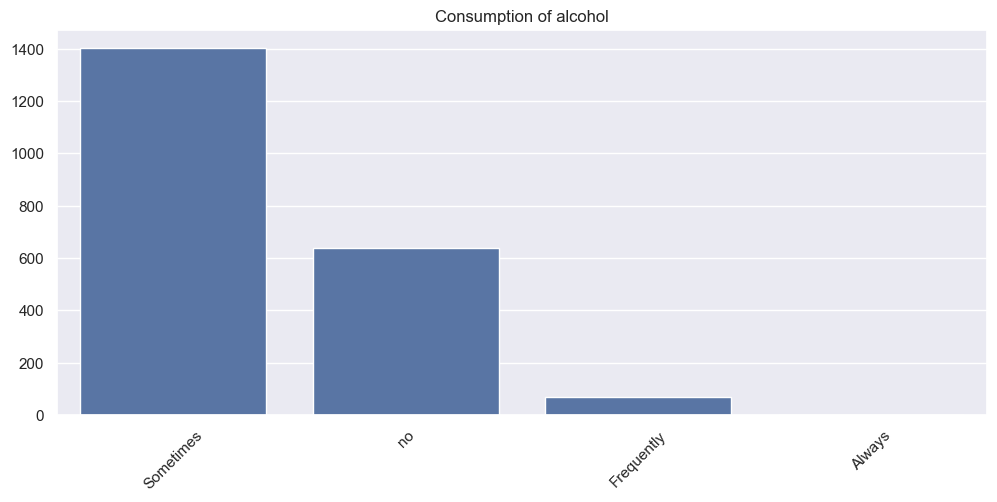

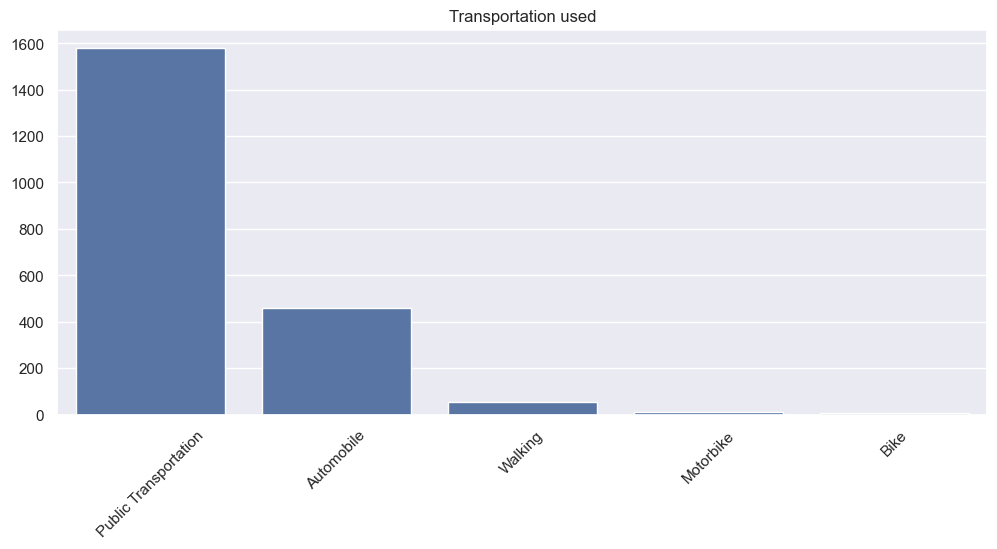

In [62]:
for feature in data_frame.columns[4:-1]:
    data = data_frame[feature].value_counts()
    values = data_frame[feature].value_counts().index.to_list()
    counts = data_frame[feature].value_counts().to_list()
    
    plt.figure(figsize=(12,5))
    ax = sb.barplot(x=values, y=counts)
    
    plt.title(feature)
    plt.xticks(rotation=45)
    print(feature, values, counts)


## Data Preprocessing

In [63]:
data_frame_copy.head()

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.0,162.0,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public Transportation,Normal Weight
1,Female,21.0,152.0,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public Transportation,Normal Weight
2,Male,23.0,180.0,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public Transportation,Normal Weight
3,Male,27.0,180.0,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight Level I
4,Male,22.0,178.0,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public Transportation,Overweight Level II


#### Since classifier cannot operate with label data directly, One Hot Encoder and Label Encoding will be used to assign numeric values to each category

In [64]:
# Identify categorical variables (data type is 'object')
is_categorical = data_frame_copy.dtypes == object
print(is_categorical)

# When dtype == object is 'True'
print(is_categorical[is_categorical])
cat_labels = is_categorical[is_categorical].index
print('Categorical variables:', cat_labels)

# When dtype == object is 'False'
non_categorical = is_categorical[~is_categorical].index
print('Non Categorical variables:', non_categorical)



Gender                                        True
Age                                          False
Height                                       False
Weight                                       False
Family History with Overweight                True
Frequent consumption of high caloric food     True
Frequency of consumption of vegetables       False
Number of main meals                         False
Consumption of food between meals             True
Smoke                                         True
Consumption of water daily                   False
Calories consumption monitoring               True
Physical activity frequency                  False
Time using technology devices                False
Consumption of alcohol                        True
Transportation used                           True
Obesity                                       True
dtype: bool
Gender                                       True
Family History with Overweight               True
Frequent consumption 

In [65]:
# Identify categorical variables with more than 2 unique values
multi_col = {col: data_frame_copy[col].unique() for col in cat_labels if len(data_frame_copy[col].unique()) > 2}

print(multi_col)
print('\n')
print('Categorical variables with more than 2 values/answers:', list(multi_col.keys()))


{'Consumption of food between meals': array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object), 'Consumption of alcohol': array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object), 'Transportation used': array(['Public Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object), 'Obesity': array(['Normal Weight', 'Overweight Level I', 'Overweight Level II',
       'Obesity Type I', 'Insufficient Weight', 'Obesity Type II',
       'Obesity Type III'], dtype=object)}


Categorical variables with more than 2 values/answers: ['Consumption of food between meals', 'Consumption of alcohol', 'Transportation used', 'Obesity']


In [66]:
data_frame_copy.head(3)

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.0,162.0,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public Transportation,Normal Weight
1,Female,21.0,152.0,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public Transportation,Normal Weight
2,Male,23.0,180.0,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public Transportation,Normal Weight


In [67]:
data_frame_copy.columns

def col_no(x):
    d = {}
    d[data_frame_copy.columns[x]] = x
    return(d)

print([col_no(x) for x in range(0, len(data_frame_copy.columns))])


[{'Gender': 0}, {'Age': 1}, {'Height': 2}, {'Weight': 3}, {'Family History with Overweight': 4}, {'Frequent consumption of high caloric food': 5}, {'Frequency of consumption of vegetables': 6}, {'Number of main meals': 7}, {'Consumption of food between meals': 8}, {'Smoke': 9}, {'Consumption of water daily': 10}, {'Calories consumption monitoring': 11}, {'Physical activity frequency': 12}, {'Time using technology devices': 13}, {'Consumption of alcohol': 14}, {'Transportation used': 15}, {'Obesity': 16}]


In [68]:
y = data_frame['Obesity']
y


0             Normal Weight
1             Normal Weight
2             Normal Weight
3        Overweight Level I
4       Overweight Level II
               ...         
2106       Obesity Type III
2107       Obesity Type III
2108       Obesity Type III
2109       Obesity Type III
2110       Obesity Type III
Name: Obesity, Length: 2111, dtype: object

In [69]:
x = data_frame_copy[data_frame_copy.columns[:-1]]
y = data_frame['Obesity']

x = data_frame_copy[data_frame_copy.columns[:-1]].copy()
x[['Weight', 'Height', 'Age']] = x[['Weight', 'Height', 'Age']].round()

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)


The target value, obesity level, will be transformed into digit label with LabelEncoder.

StandardScaler is applied to attributes with values which ranges are not consistent with the rest, to avoid disproportionate weight assigned to these values. (i.e. Age, Height, Weight).

Features that are ordinal in nature (i.e. answers including 'never', 'sometimes', 'always') will be preprocessed with OrdinalEncoder (exactly the same function is LabelEncoder, however this will take in multiple arguments as the latter is meant for the y-value only).

Features that are non-ordinal in nature will be preprocessed with OneHotEncoder, so that the generated labels will not be interpreted in a way that suggests one answer is more important than the other (e.g. 3 is more important than 1).

SimpleImputer is applied to all attributes to deal with missing values.

All of these preprocessing techniques will be bundled into a pipeline, which will be deployed with classifiers later.

In [70]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
print(y_train)



[0 5 4 ... 3 5 6]


In [71]:
scaled_features = ['Age', 'Height', 'Weight']
scaled_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

ordinal_features = ['Consumption of food between meals', 'Consumption of alcohol']
ordinal_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OrdinalEncoder())
])

onehot_features = ['Gender', 'Family History with Overweight', 'Frequent consumption of high caloric food', 'Smoke', 'Calories consumption monitoring', 'Transportation used']
onehot_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(transformers=[
    ('scale', scaled_pipeline, scaled_features),
    ('ordinal', ordinal_pipeline, ordinal_features),
    ('onehot', onehot_pipeline, onehot_features)
], remainder='passthrough')

classifier_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])


In [72]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

# Detect feature types
numeric_features = x_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x_train.select_dtypes(include=['object', 'category']).columns

# Define preprocessing for each type
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough',  # Keep other columns if any
    force_int_remainder_cols=False  # Avoid future warning
)

# Build the model pipeline
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Fit the model
knn_pipeline.fit(x_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Height', 'Weight', 'Frequency of consumption of vegetables',
       'Number of main meals', 'Consumption of water daily',
       'Physical activity frequency', 'Time using technology devices'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['Gender', 'Family History with Overweight',
       'Frequent consumption of high caloric food',
       'Consumption of food between meals', 'Smoke',
       'Calories consumption monitoring', 'Consumption of alcohol',
       'Transportation used'],
      dtype='object'))])),
                ('classifier', KNeighborsClassifier())])

In [73]:
# Just get the transformed features (before the classifier)
processed_train_data = preprocessor.fit_transform(x_train)
print(processed_train_data.shape)


(1899, 31)


In [74]:
# Column name of first two steps in pipeline

columns_list = [col for group in [scaled_features, ordinal_features] for col in group]
columns_list


['Age',
 'Height',
 'Weight',
 'Consumption of food between meals',
 'Consumption of alcohol']

In [75]:
# Get the list of transformers from the ColumnTransformer
ohe = knn_pipeline.named_steps['preprocessor'].named_transformers_['cat']

# Get the feature names after OneHotEncoding
ohe_cols = ohe.get_feature_names_out(input_features=categorical_features)

# Convert to list if needed
ohe_cols = list(ohe_cols)
print(ohe_cols)


['Gender_Female', 'Gender_Male', 'Family History with Overweight_no', 'Family History with Overweight_yes', 'Frequent consumption of high caloric food_no', 'Frequent consumption of high caloric food_yes', 'Consumption of food between meals_Always', 'Consumption of food between meals_Frequently', 'Consumption of food between meals_Sometimes', 'Consumption of food between meals_no', 'Smoke_no', 'Smoke_yes', 'Calories consumption monitoring_no', 'Calories consumption monitoring_yes', 'Consumption of alcohol_Always', 'Consumption of alcohol_Frequently', 'Consumption of alcohol_Sometimes', 'Consumption of alcohol_no', 'Transportation used_Automobile', 'Transportation used_Bike', 'Transportation used_Motorbike', 'Transportation used_Public Transportation', 'Transportation used_Walking']


In [76]:
# Column names of remainder='Passthrough' - remaining columns that didn't get processed
non_categorical


Index(['Age', 'Height', 'Weight', 'Frequency of consumption of vegetables',
       'Number of main meals', 'Consumption of water daily',
       'Physical activity frequency', 'Time using technology devices'],
      dtype='object')

In [77]:
import pandas as pd

# Get numeric columns (no transformation names needed, passed through as-is or scaled)
numeric_cols = numeric_features.tolist()

# Get OneHotEncoded column names
ohe = knn_pipeline.named_steps['preprocessor'].named_transformers_['cat']
ohe_cols = ohe.get_feature_names_out(input_features=categorical_features)

# Combine all feature names
all_feature_names = list(numeric_cols) + list(ohe_cols)

# Build DataFrame from transformed data
transformed_x_train = pd.DataFrame(processed_train_data, columns=all_feature_names)

print(transformed_x_train.shape)
transformed_x_train.head()



(1899, 31)


,Age,Height,Weight,Frequency of consumption of vegetables,Number of main meals,Consumption of water daily,Physical activity frequency,Time using technology devices,Gender_Female,Gender_Male,...,Calories consumption monitoring_yes,Consumption of alcohol_Always,Consumption of alcohol_Frequently,Consumption of alcohol_Sometimes,Consumption of alcohol_no,Transportation used_Automobile,Transportation used_Bike,Transportation used_Motorbike,Transportation used_Public Transportation,Transportation used_Walking
0,-1.159223,0.410262,-1.403095,-0.726125,0.384404,-1.475950,-0.002353,0.499199,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.682255,1.057433,-0.065870,-0.726125,0.384404,1.431549,1.114655,0.499199,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.364277,0.518123,1.882657,0.988938,0.384404,-0.022200,1.114655,0.499199,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.066625,0.625985,1.233148,0.988938,0.384404,1.431549,-1.119361,1.975803,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.271680,-0.884082,0.927496,0.988938,0.384404,1.431549,-1.119361,-0.977405,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [78]:
# transformed/processed features

transformed_x_train


,Age,Height,Weight,Frequency of consumption of vegetables,Number of main meals,Consumption of water daily,Physical activity frequency,Time using technology devices,Gender_Female,Gender_Male,...,Calories consumption monitoring_yes,Consumption of alcohol_Always,Consumption of alcohol_Frequently,Consumption of alcohol_Sometimes,Consumption of alcohol_no,Transportation used_Automobile,Transportation used_Bike,Transportation used_Motorbike,Transportation used_Public Transportation,Transportation used_Walking
0,-1.159223,0.410262,-1.403095,-0.726125,0.384404,-1.475950,-0.002353,0.499199,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.682255,1.057433,-0.065870,-0.726125,0.384404,1.431549,1.114655,0.499199,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.364277,0.518123,1.882657,0.988938,0.384404,-0.022200,1.114655,0.499199,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.066625,0.625985,1.233148,0.988938,0.384404,1.431549,-1.119361,1.975803,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.271680,-0.884082,0.927496,0.988938,0.384404,1.431549,-1.119361,-0.977405,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1894,0.271680,1.704605,1.194941,-0.726125,0.384404,1.431549,-0.002353,-0.977405,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1895,1.861571,-0.776220,-0.256902,0.988938,0.384404,-1.475950,-1.119361,-0.977405,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1896,-0.046299,-0.884082,0.430813,0.988938,0.384404,-1.475950,1.114655,-0.977405,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1897,-0.205288,0.194538,-0.409728,-0.726125,0.384404,-0.022200,-1.119361,0.499199,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [79]:
le = LabelEncoder()
y_test = le.fit_transform(y_test)
le_name_mapping = dict(zip(le.transform(le.classes_), le.classes_))
print(le_name_mapping)


{np.int64(0): 'Insufficient Weight', np.int64(1): 'Normal Weight', np.int64(2): 'Obesity Type I', np.int64(3): 'Obesity Type II', np.int64(4): 'Obesity Type III', np.int64(5): 'Overweight Level I', np.int64(6): 'Overweight Level II'}


## Model Selection

Classifiers are selected and stored in a list, each classifier will be looped through and the preprocessor will be applied each time. The accuracy score of every classifier will be printed out.

In [81]:
classifiers = [
    KNeighborsClassifier(n_neighbors = 5),
    ]

top_models = []

for model in classifiers:
    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('classifier', model)])
    
    # training model
    model_pipeline.fit(x_train, y_train)   
    print(model)
    
    acc_score = model_pipeline.score(x_test, y_test)
    print("model score: %.3f" % acc_score)
    
    # using the model to predict
    y_pred = model_pipeline.predict(x_test)
    
    target_names = [le_name_mapping[x] for x in le_name_mapping]
    print(classification_report(y_test, y_pred, target_names=target_names))

    

KNeighborsClassifier()
model score: 0.825
                     precision    recall  f1-score   support

Insufficient Weight       0.80      0.97      0.88        29
      Normal Weight       0.84      0.55      0.67        29
     Obesity Type I       0.63      0.96      0.76        28
    Obesity Type II       0.93      0.96      0.95        27
   Obesity Type III       1.00      1.00      1.00        34
 Overweight Level I       0.79      0.68      0.73        28
Overweight Level II       0.86      0.68      0.76        37

           accuracy                           0.83       212
          macro avg       0.84      0.83      0.82       212
       weighted avg       0.84      0.83      0.82       212



### Classification Report

Classification Report is used to investigate the performance of each classifier in classes (level of obesity).

'Precision' shows the percentage of the classfier that is able to correctly predict the class. (i.e. True Positive / (True Positive + False Positive)

'Recall' shows the percentage of the actual positive cases that the classifer is able to identify. (i.e. True Positive / (True Positive + False Negative)

'F1' is the harmonic mean between Precision and Recall.

'Support' is the number of occurence of occurence of the given class in dataset. More consistent the number of 'Support' of each class is, the more balanced the dataset.

The following models score the highest in terms of accuracy.

In [82]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import joblib

# Store all model results
model_results = []

# Iterate through each algorithm
for algo in classifiers:
    ml_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', algo)])
    
    # Fit model
    ml_pipeline.fit(x_train, y_train)
    print(f"\n✅ Trained {algo.__class__.__name__}")
    
    # Accuracy
    test_accuracy = ml_pipeline.score(x_test, y_test)
    print(f"📊 Accuracy: {test_accuracy:.3f}")
    
    # Predict labels
    predictions = ml_pipeline.predict(x_test)
    
    # Decode labels
    label_names = [le_name_mapping[idx] for idx in sorted(le_name_mapping)]
    print("📋 Classification Report:")
    print(classification_report(y_test, predictions, target_names=label_names))

    # Store model and score
    model_results.append((test_accuracy, algo, ml_pipeline))

# Sort by accuracy (descending)
model_results.sort(reverse=True, key=lambda val: val[0])

# Save top-3 models
for rank, (score, algo, ml_pipeline) in enumerate(model_results[:3]):
    model_file = f"{rank}_{algo.__class__.__name__}_models.pkl"
    joblib.dump(ml_pipeline, model_file)
    print(f"💾 Saved Top-{rank+1} Model: '{model_file}' with Accuracy: {score:.3f}")




✅ Trained KNeighborsClassifier
📊 Accuracy: 0.825
📋 Classification Report:
                     precision    recall  f1-score   support

Insufficient Weight       0.80      0.97      0.88        29
      Normal Weight       0.84      0.55      0.67        29
     Obesity Type I       0.63      0.96      0.76        28
    Obesity Type II       0.93      0.96      0.95        27
   Obesity Type III       1.00      1.00      1.00        34
 Overweight Level I       0.79      0.68      0.73        28
Overweight Level II       0.86      0.68      0.76        37

           accuracy                           0.83       212
          macro avg       0.84      0.83      0.82       212
       weighted avg       0.84      0.83      0.82       212

💾 Saved Top-1 Model: '0_KNeighborsClassifier_models.pkl' with Accuracy: 0.825
